Program 1

In [493]:
import time
import csv
import math
from math import atan2, sqrt, radians,sin,cos
import heapq
import matplotlib.pyplot as plt
import matplotlib.animation as animation
import networkx as nx

Create a dictionary of city coordinates and adjacencies


In [494]:
city_coordinates = {}
adjacency_graph = {}
G = nx.Graph()

Read Coordinates.txt

In [495]:

# Open the CSV file in read mode
with open('/Users/danielhuynh/Desktop/JPNotebook/AIProgram1/coordinates.csv', 'r') as file:
  # Create a CSV reader object using csv.reader
  csv_reader = csv.reader(file)

  for row in csv_reader:
    city_name, latitude, longitude = row
    city_coordinates[city_name] = (float(latitude), float(longitude))

# Print the city coordinates dictionary
print(city_coordinates)


{'Abilene': (38.9220277, -97.2666667), 'Andover': (37.6868403, -97.1657752), 'Anthony': (37.1575168, -98.0728946), 'Argonia': (37.2670166, -97.7726807), 'Attica': (37.2421271, -98.2351967), 'Augusta': (37.6913277, -97.0537108), 'Bluff_City': (37.0760844, -97.8793212), 'Caldwell': (37.0346731, -97.6179436), 'Cheney': (37.632882, -97.789442), 'Clearwater': (37.5166968, -97.5325458), 'Coldwater': (37.2574937, -99.3549149), 'Derby': (37.5517122, -97.2867892), 'El_Dorado': (37.8098997, -96.8943313), 'Emporia': (38.3792991, -96.2615044), 'Florence': (38.2434672, -96.9378672), 'Greensburg': (37.6050677, -99.3005641), 'Harper': (37.2852232, -98.0368352), 'Haven': (37.9020486, -97.7926952), 'Hays': (38.88509, -99.326202), 'Hillsboro': (38.3494571, -97.2156415), 'Hutchinson': (38.0572062, -97.9414547), 'Junction_City': (39.0379342, -96.8799338), 'Kingman': (37.6480942, -98.1693967), 'Kiowa': (37.0190996, -98.4940572), 'Leon': (37.6892622, -96.7916587), 'Lyons': (38.3477177, -98.22167), 'Manhatta

Read Adjacencies.txt

In [496]:
with open('/Users/danielhuynh/Desktop/JPNotebook/AIProgram1/Adjacencies.txt', 'r') as file_2:
    for row in file_2:
        city_2, city_1 = row.strip().split()
        if city_1 not in adjacency_graph:
            adjacency_graph[city_1]= []
        if city_2 not in adjacency_graph:
            adjacency_graph[city_2] = []
        adjacency_graph[city_1].append(city_2)
        adjacency_graph[city_2].append(city_1)


Brute-Force Search

In [497]:
#def brute_force_search(sourceNode, goalNode):
    #In BFS we'll have 2 lists keeping track of the nodes we visited and haven't visited.
    #visitedNodes = set()
    #stack = [(sourceNode, [])]
    #while stack:
       # currentNode, pathNodes = stack.pop()
        #if currentNode == goalNode:
          #  return pathNodes + [currentNode]
        #if currentNode not in visitedNodes:
           # visitedNodes.add(currentNode)
            #for adjacentNode in adjaceny_graph.get(currentNode, []):
               # if adjacentNode not in visitedNodes:
                   # stack.append((adjacentNode, pathNodes + [currentNode]))
    #return None

Breadth-first Search

In [498]:
def breadth_first_search(sourceNode, goalNode):
    visitedNodes = set()
    queue = [(sourceNode, [])]
    
    while queue:
        currentNode, pathNodes = queue.pop(0)
        if currentNode == goalNode:
            return pathNodes + [currentNode]
        if currentNode not in visitedNodes:
            visitedNodes.add(currentNode)
            for adjacentNode in adjacency_graph.get(currentNode, []):
                if adjacentNode not in visitedNodes:
                    queue.append((adjacentNode, pathNodes + [currentNode]))
    return None

Depth-first Search

In [499]:
def depth_first_search(sourceNode, goalNode):
    visitedNodes = set()
    stack = [(sourceNode, [])]
    
    while stack:
        currentNode, pathNodes = stack.pop()
        if currentNode == goalNode:
            return pathNodes + [currentNode]
        if currentNode not in visitedNodes:
            visitedNodes.add(currentNode)
            for adjacentNode in adjacency_graph.get(currentNode, []):
                if adjacentNode not in visitedNodes:
                    stack.append((adjacentNode, pathNodes + [currentNode]))
    return None

ID-DFS Search

In [500]:
def id_dfs(sourceNode, goalNode):
    depth = 0
    while True:
        result = dfs_recursive(sourceNode, goalNode, [], depth)
        if result is not None:
            return result
        depth += 1

def dfs_recursive(currentNode, goalNode, pathNodes, depth):
    if currentNode == goalNode:
        return pathNodes + [currentNode]
    if depth == 0:
        return None
    for adjacentNode in adjacency_graph.get(currentNode, []):
        if adjacentNode not in pathNodes:
            result = dfs_recursive(adjacentNode, goalNode, pathNodes + [currentNode], depth - 1)
            if result is not None:
                return result
    return None


Heuristic Approaches

In [501]:
def distance(coordinate_1, coordinate_2):
    latitude_1, longitude_1 = coordinate_1
    latitude_2, longitude_2 = coordinate_2
    
    radius = 3958.8
    difference_latitude = radians(latitude_2 - latitude_1)
    difference_longitude = radians(longitude_2- longitude_1)
    
    eqn = sin(difference_latitude/2)**2 + cos(radians(latitude_1)) * cos(radians(latitude_2)) * sin(difference_longitude/2)**2
    distance = 2*atan2(sqrt(eqn),sqrt(1-eqn))
    return radius * distance

Best-First Search

In [502]:
def best_first_search(sourceNode, goalNode):
    visitedNodes = set()
    heap = [(distance(city_coordinates[sourceNode], city_coordinates[goalNode]), sourceNode, [])]

    while heap:
        _, currentNode, pathNodes = heapq.heappop(heap)
        if currentNode == goalNode:
            return pathNodes + [currentNode]
        if currentNode not in visitedNodes:
            visitedNodes.add(currentNode)
            for adjacentNode in adjacency_graph.get(currentNode, []):
                if adjacentNode not in visitedNodes:
                    heapq.heappush(heap, (distance(city_coordinates[adjacentNode], city_coordinates[goalNode]), adjacentNode, pathNodes + [currentNode]))
    return None

A* Search

In [503]:
def a_star_search(sourceNode, goalNode):
    visitedNodes = set()
    heap = [(0, distance(city_coordinates[sourceNode], city_coordinates[goalNode]), sourceNode, [])]

    while heap:
        _, _, currentNode, pathNodes = heapq.heappop(heap)
        if currentNode == goalNode:
            return pathNodes + [currentNode]
        if currentNode not in visitedNodes:
            visitedNodes.add(currentNode)
            for adjacentNode in adjacency_graph.get(currentNode, []):
                if adjacentNode not in visitedNodes:
                    g = len(pathNodes) + 1  # Cost from start to current node
                    h = distance(city_coordinates[adjacentNode], city_coordinates[goalNode])  # Heuristic cost
                    f = g + h  # Total cost (f = g + h)
                    heapq.heappush(heap, (f, h, adjacentNode, pathNodes + [currentNode]))
    return None

Main Program

Abilene
Andover
Anthony
Argonia
Attica
Augusta
Bluff_City
Caldwell
Cheney
Clearwater
Coldwater
Derby
El_Dorado
Emporia
Florence
Greensburg
Harper
Haven
Hays
Hillsboro
Hutchinson
Junction_City
Kingman
Kiowa
Leon
Lyons
Manhattan
Marion
Mayfield
McPherson
Medicine_Lodge
Mulvane
Newton
Oxford
Pratt
Rago
Salina
Sawyer
South_Haven
Topeka
Towanda
Viola
Wellington
Wichita
Winfield
Zenda
Enter START CITY: Wichita
Enter GOAL CITY: Zenda
Select a method:
1. Breadth-first
2. Depth-first
3. ID-FS
4. Best-first
5. A*
Enter Search Algorithm 1-5: 1


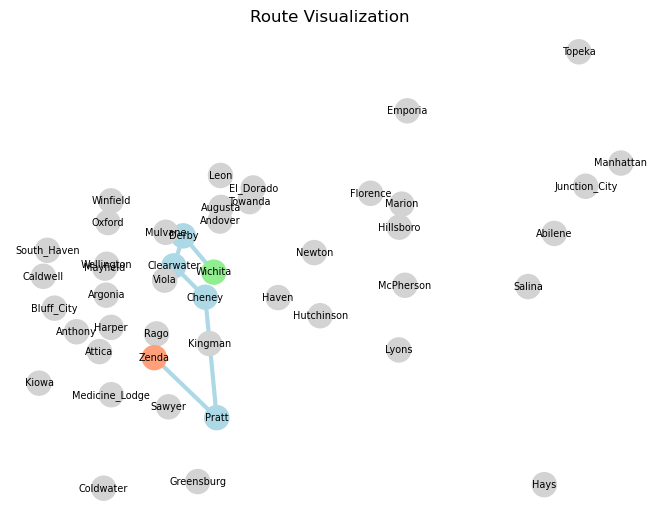

Route: Wichita -> Derby -> Clearwater -> Cheney -> Pratt -> Zenda
Total distance: 133.32623273960039 Miles
Execution Time 0.00016689300537109375 seconds
Search again? yes/no yes
Enter START CITY: Pratt
Enter GOAL CITY: Salina
Select a method:
1. Breadth-first
2. Depth-first
3. ID-FS
4. Best-first
5. A*
Enter Search Algorithm 1-5: 1


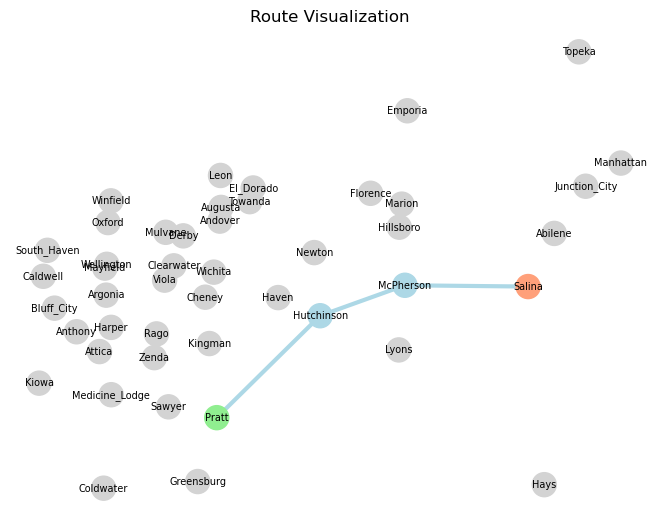

Route: Pratt -> Hutchinson -> McPherson -> Salina
Total distance: 109.63738427656008 Miles
Execution Time 0.00037384033203125 seconds
Search again? yes/no yes
Enter START CITY: Pratt
Enter GOAL CITY: Emporia
Select a method:
1. Breadth-first
2. Depth-first
3. ID-FS
4. Best-first
5. A*
Enter Search Algorithm 1-5: 2


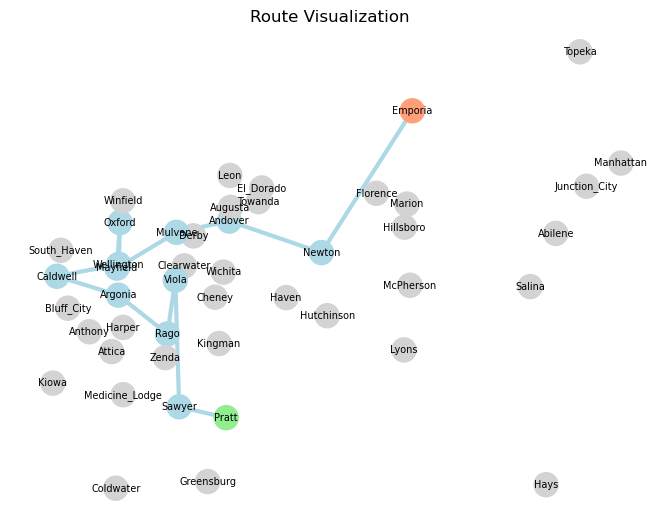

Route: Pratt -> Sawyer -> Viola -> Rago -> Argonia -> Caldwell -> Wellington -> Oxford -> Mayfield -> Mulvane -> Andover -> Newton -> Emporia
Total distance: 323.13359868141083 Miles
Execution Time 0.0002689361572265625 seconds
Search again? yes/no yes
Enter START CITY: Pratt
Enter GOAL CITY: Emporia
Select a method:
1. Breadth-first
2. Depth-first
3. ID-FS
4. Best-first
5. A*
Enter Search Algorithm 1-5: 1


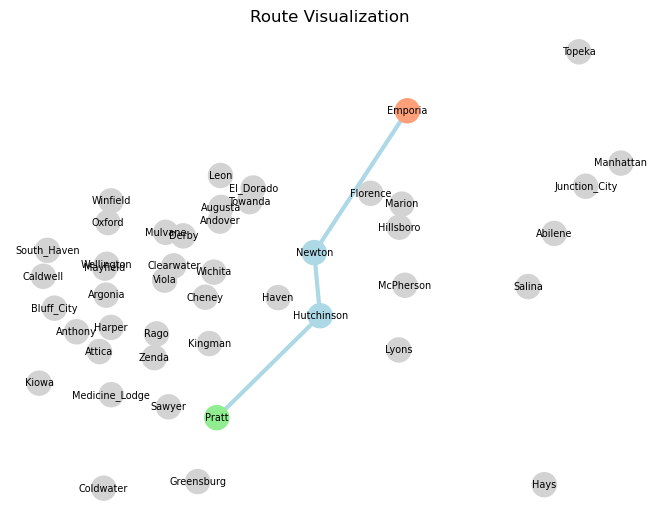

Route: Pratt -> Hutchinson -> Newton -> Emporia
Total distance: 148.29409722250622 Miles
Execution Time 0.0001761913299560547 seconds
Search again? yes/no yes
Enter START CITY: Kiowa
Enter GOAL CITY: Manhattan
Select a method:
1. Breadth-first
2. Depth-first
3. ID-FS
4. Best-first
5. A*
Enter Search Algorithm 1-5: 1


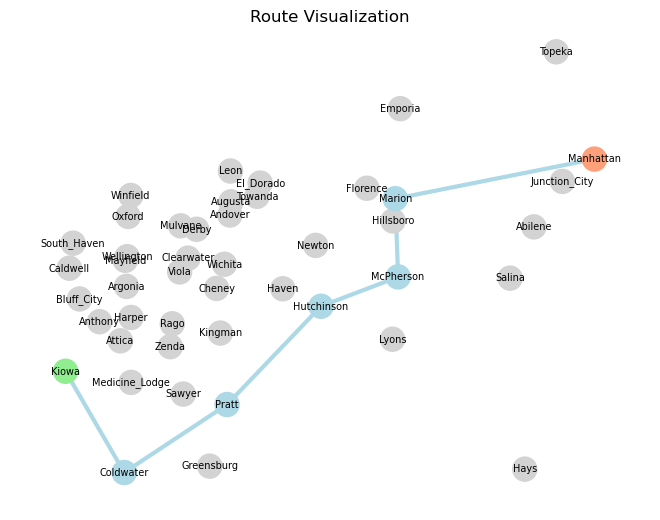

Route: Kiowa -> Coldwater -> Pratt -> Hutchinson -> McPherson -> Marion -> Manhattan
Total distance: 266.08194255804 Miles
Execution Time 0.00020122528076171875 seconds


In [ ]:
from IPython.display import display, clear_output

for city_name in city_coordinates.keys():
    print(city_name)
while True:
    start_city = input("Enter START CITY: ")
    end_city = input("Enter GOAL CITY: ")

    if start_city not in city_coordinates or end_city not in city_coordinates:
        print("INVALID CITY")
        continue
    
    G.clear()  # Clear the graph for each new search
    G.add_nodes_from(city_coordinates.keys())

    
    print("Select a method:")
    print("1. Breadth-first")
    print("2. Depth-first")
    print("3. ID-FS")
    print("4. Best-first")
    print("5. A*")
    
    userInput = int(input("Enter Search Algorithm 1-5: "))

    start_time = time.time()

    if userInput == 1:
        path = breadth_first_search(start_city, end_city)
    elif userInput == 2:
        path = depth_first_search(start_city, end_city)
    elif userInput == 3:
        path = id_dfs(start_city, end_city)
    elif userInput == 4:
        path = best_first_search(start_city, end_city)
    elif userInput == 5:
        path = a_star_search(start_city, end_city)
    else:
        print("Invalid Input!")
        continue

    end_time = time.time()
    
    #def update_plot(frame):
        #plt.clf()  # Clear the current figure
        #plt.title(f"Step {frame + 1}")
    if path:
        #clear_output(wait=True)
        #plt.clf()  # Clear the current figure
        #plt.title(f"Step {frame + 1}")
        
        edges = [(path[i], path[i + 1]) for i in range(len(path) - 1)]
        G.add_edges_from(edges)

        # Create a dictionary with city names as keys and their coordinates as values
        node_positions = {city: city_coordinates[city] for city in G.nodes()}

        # Define node colors based on whether a node is part of the path or not
        node_colors = ['lightgreen' if node == start_city else 'lightsalmon' if node == end_city else 'lightblue' if node in path else 'lightgray' for node in G.nodes()]
        
        #nx.draw(G, pos=node_positions, with_labels=True, font_size=7, font_color='whitesmoke', font_weight='light',edge_color='lightblue',width=3,node_color=range(len(node_positions)), node_size=300, cmap=plt.cm.Blues)
        nx.draw(G, pos=node_positions, with_labels=True, node_size=300, font_size=7, font_color='black',
                node_color=node_colors, font_weight='light', edge_color='lightblue', width=3)
        
        #time.sleep(1)
    #ani = animation.FuncAnimation(plt.gcf(), update_plot, frames=30, repeat=True)
    #display(plt.gcf())
    plt.title("Route Visualization")
    plt.show()


   
        
    if path:
        print("Route:", " -> ".join(path))
        
        total_distance = sum(distance(city_coordinates[path[i]], city_coordinates[path[i+1]]) for i in range(len(path)-1))
        print("Total distance:", total_distance, "Miles")
        print("Execution Time", end_time - start_time, "seconds")
    else:
        print("No route found.")

    choice = input("Search again? yes/no ")
    if choice.lower() != 'yes':
        break